In [154]:
# Import the necessary libraries 

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot

# import function to split data into train and test dfs
from sklearn.model_selection import train_test_split

# Optimization module in scipy
from scipy import optimize

# Import logistic regression model from SK Learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [155]:
os.chdir('C:\\Users\\belincoln\\repos\\BudgetPredict')
# Set working directory to the data folder so you can correctly read in the csv files
%cd data

C:\Users\belincoln\repos\BudgetPredict\data


In [156]:
# Read data from DHS Contracts
df = pd.read_csv('FY2019_070_Contracts_Full_20200110_1.csv', header = 0, usecols = ['contract_transaction_unique_key', 
                        'federal_action_obligation','total_dollars_obligated', 'base_and_exercised_options_value', 
                        'current_total_value_of_award', 'base_and_all_options_value','potential_total_value_of_award'],
                 dtype = {'contract_transaction_unique_key':'str','federal_action_obligation': 'float',
                        'total_dollars_obligated': 'float', 'base_and_exercised_options_value': 'float', 
                        'current_total_value_of_award': 'float', 'base_and_all_options_value': 'float',
                        'potential_total_value_of_award': 'float'})

In [157]:
df

,contract_transaction_unique_key,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award
0,7012_7012_HSCEMS16F00057_P00005_HSCEMS12A00018_0,-7702.86,6003953.42,-7702.86,6059478.42,-148339.00,6067181.28
1,7022_7022_HSFE2015J0271_P00002_HSFE2013D0161_0,0.00,104830.31,0.00,104830.31,0.00,104830.31
2,7008_-NONE-_70Z02918PX0808600_P00001_-NONE-_0,-1566.00,2088.00,-1566.00,2088.00,-1566.00,2088.00
3,7008_-NONE-_70Z03818PW0000011_P00001_-NONE-_0,0.00,1152695.02,0.00,1152695.02,0.00,1152695.02
4,7008_-NONE-_70Z08018PP45K8500_P00001_-NONE-_0,-2208.12,13654.38,-2208.12,13654.38,-2208.12,13654.38
...,...,...,...,...,...,...,...
66528,7008_-NONE-_70Z03819PD0000080_P00001_-NONE-_0,0.00,17640.36,0.00,17640.36,0.00,17640.36
66529,7008_-NONE-_70Z08019P29577B00_P00001_-NONE-_0,-8132.53,7800.16,-8132.53,7800.16,-8132.53,7800.16
66530,7014_7014_HSBP1015F00038_P00001_HSBP1013A00012_0,-3840.20,513427.20,-3840.20,513427.20,0.00,517267.40
66531,7014_7014_HSBP1015F00113_P00001_HSBP1013A00012_0,-159391.97,2757666.44,-159391.97,2757666.44,-159391.97,2757666.44


In [158]:
# Create 3 new features for analysis
df['Percent awarded over potential total awarded'] = df['current_total_value_of_award'] / df['potential_total_value_of_award']
df['Percent Cumulatively Obligated over potential total value of award'] = df['total_dollars_obligated'] / df['potential_total_value_of_award']
df['Percent Cumulatively Obligated over total value already awarded'] = df['total_dollars_obligated'] / df['current_total_value_of_award']

# Create Indicator Variable
df['Indicator'] = df['federal_action_obligation']<-1000

# set index to each transaction key
df.set_index('contract_transaction_unique_key', inplace = True)

In [159]:
df.drop('federal_action_obligation', axis =1, inplace = True)
df = df.fillna(0)

In [160]:
df

,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,Percent awarded over potential total awarded,Percent Cumulatively Obligated over potential total value of award,Percent Cumulatively Obligated over total value already awarded,Indicator
contract_transaction_unique_key,,,,,,,,,
7012_7012_HSCEMS16F00057_P00005_HSCEMS12A00018_0,6003953.42,-7702.86,6059478.42,-148339.00,6067181.28,0.998730,0.989579,0.990837,True
7022_7022_HSFE2015J0271_P00002_HSFE2013D0161_0,104830.31,0.00,104830.31,0.00,104830.31,1.000000,1.000000,1.000000,False
7008_-NONE-_70Z02918PX0808600_P00001_-NONE-_0,2088.00,-1566.00,2088.00,-1566.00,2088.00,1.000000,1.000000,1.000000,True
7008_-NONE-_70Z03818PW0000011_P00001_-NONE-_0,1152695.02,0.00,1152695.02,0.00,1152695.02,1.000000,1.000000,1.000000,False
7008_-NONE-_70Z08018PP45K8500_P00001_-NONE-_0,13654.38,-2208.12,13654.38,-2208.12,13654.38,1.000000,1.000000,1.000000,True
...,...,...,...,...,...,...,...,...,...
7008_-NONE-_70Z03819PD0000080_P00001_-NONE-_0,17640.36,0.00,17640.36,0.00,17640.36,1.000000,1.000000,1.000000,False
7008_-NONE-_70Z08019P29577B00_P00001_-NONE-_0,7800.16,-8132.53,7800.16,-8132.53,7800.16,1.000000,1.000000,1.000000,True
7014_7014_HSBP1015F00038_P00001_HSBP1013A00012_0,513427.20,-3840.20,513427.20,0.00,517267.40,0.992576,0.992576,1.000000,True


In [161]:
df.shape

(66533, 9)

In [162]:
df.dtypes

total_dollars_obligated                                               float64
base_and_exercised_options_value                                      float64
current_total_value_of_award                                          float64
base_and_all_options_value                                            float64
potential_total_value_of_award                                        float64
Percent awarded over potential total awarded                          float64
Percent Cumulatively Obligated over potential total value of award    float64
Percent Cumulatively Obligated over total value already awarded       float64
Indicator                                                                bool
dtype: object

In [189]:
# This is the percentage of De-Obligations in the sample (before test/train split)
print('Total number of De-Obligations: ' +str(df['Indicator'].sum()))
print('Percentage of De-Obligations: '+str(df['Indicator'].sum()/len(df)))

Total number of De-Obligations: 5920
Percentage of De-Obligations: 0.08897840169539928


# Beginning of Regression Analysis

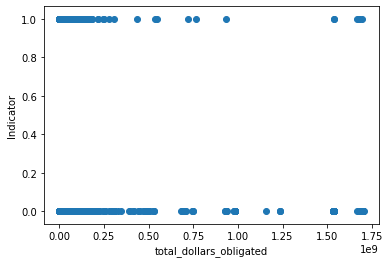

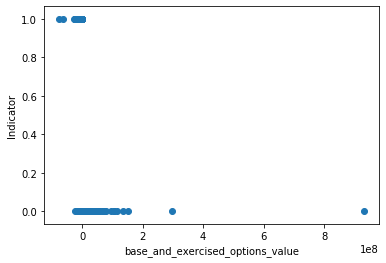

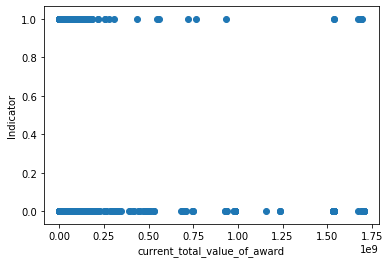

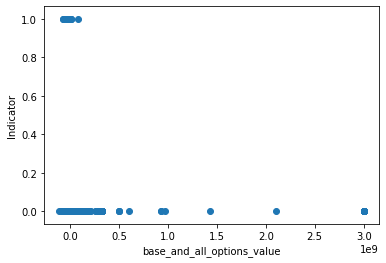

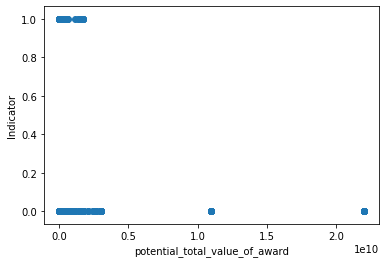

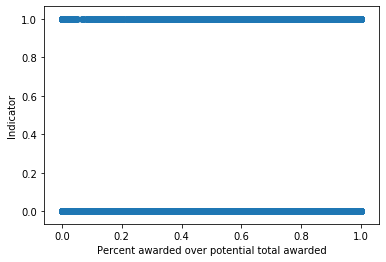

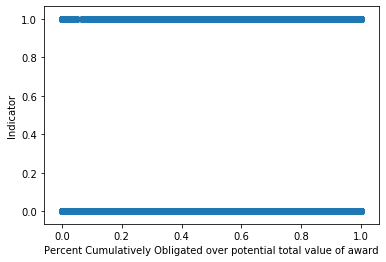

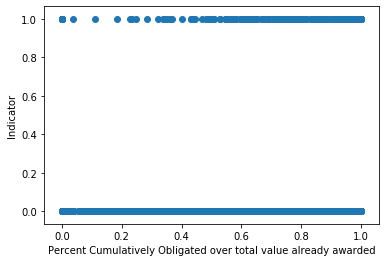

In [164]:
# Show Scatterplot of all features against indicator variable to discern any immediate relationships
features = len(df.columns) - 1
for i in range(features):
    fig = pyplot.figure()
    #mask  = y == 1
    pyplot.scatter(df.iloc[:,i], df.iloc[:,-1])

   
    # add axes labels
    pyplot.xlabel(df.columns[i])
    pyplot.ylabel(df.columns[-1])
    #pyplot.legend(['Sweep', 'Not a Sweep'])
    pass

In [165]:
# Create matrix of feature variables and our dependent variable
X, y =  df.iloc[:,:-1], df.loc[:,'Indicator']

# convert y to np.array of 0s and 1s
y = np.array(y.astype(int))


In [166]:
#train the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [167]:
X_test.shape

(13307, 8)

In [168]:
# Setup the data matrix appropriately, and add ones for the intercept term
m_train, n_train = X_train.shape
m_test, n_test = X_test.shape
# Add intercept term to X
X_train = np.concatenate([np.ones((m_train, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)



In [169]:
log_model = LogisticRegression().fit(X_train, y_train)

C:\Users\belincoln\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
# Coefficents to multiply features by
log_model.coef_

array([[-1.00463470e-08,  2.29982449e-08, -3.52575701e-05,
        -3.36476291e-08, -1.96361916e-07, -2.42354857e-08,
        -8.80806348e-09, -8.72935677e-09, -9.43794363e-09]])

In [171]:
theta = log_model.coef_[0]

In [172]:
print(theta[0])

-1.0046347044889903e-08


In [173]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    temp = 1 + np.power(np.e,-z)
    g = 1 / temp
    

    return g

In [174]:
pred = sigmoid(np.dot(X_test,theta))

C:\Users\belincoln\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in power


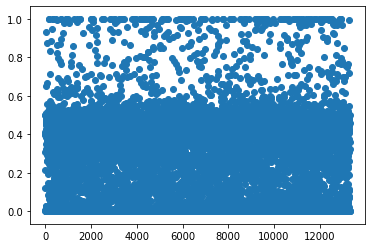

In [175]:
fig = pyplot.figure
pyplot.scatter(np.arange(len(pred)), pred)

In [176]:
# Now we will test our model using the test_set
pred = sigmoid(np.dot(X_test,theta))

C:\Users\belincoln\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in power


In [177]:
# Convert probabilty of de-obligation into prediction
pred = pred > .5
# Convert to int
pred = np.array(pred.astype(int))

In [178]:
test = pred == y_test

In [179]:
test.sum()/len(test)

0.9709927106034418

In [180]:
# Really what we are looking for here 
# is how many times a de-obligation occured and we were able to predict it?

In [181]:
# Also percentage of false positives: how many times did we predict a de-obligation and 
# it did not occur?

In [182]:
data = {'predicted value' : pred, 'test value': y_test}
testdf = pd.DataFrame(data)

In [184]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [185]:


cm = np.array(confusion_matrix(pred, y_test, labels = [1,0]))
confusion = pd.DataFrame(cm, index=[['Predicted', 'Predicted'], ['Large De-Obligation','Obligation']],
                         columns = [['Test Results', 'Test Results'],['Large De-Obligation','Obligation']])
confusion


Test Results           
                              Large De-Obligation Obligation
Predicted Large De-Obligation                1061        342
          Obligation                           44      11860

In [198]:
confusion.iloc[0].sum()+confusion.iloc[1].sum()

13307

In [201]:
correct_preds = testdf[testdf['test value'] == 1]
correct_preds2 = correct_preds[correct_preds['predicted value'] ==1]
print('Size of Test set: ' + str(len(testdf)))
print('Size of Train set: ' + str(len(X_train)))
print('Percentage of correct predictions (Accuracey): ' + str((confusion.iloc[0,0] + confusion.iloc[1,1])/len(testdf)))
print('Percentage of significant de-obligations: ' + str(len(correct_preds)/len(testdf)))
print('Percentage of de-obligations correctly predicted: ' + str(len(correct_preds2)/len(correct_preds)))

Size of Test set: 13307
Size of Train set: 53226
Percentage of correct predictions (Accuracey): 0.9709927106034418
Percentage of significant de-obligations: 0.08303900202900728
Percentage of de-obligations correctly predicted: 0.9601809954751132


<function print>

In [202]:
# Rate of False Negatives: A de-obligation occurs, but the model did not predict it. 
false_neg = testdf[testdf['predicted value'] == 0]
false_neg2 = false_neg[false_neg['test value'] == 1]
print('Number of False Negatives : ' + str(len(false_neg2)))
print('Rate of False Negative: ' + str(len(false_neg2)/len(testdf)))

Number of False Negatives : 44
Rate of False Negative: 0.0033065303975351318


In [203]:
# Show the rate of False Positives: Times the model predicted a de-obligation, yet there wasn't one

false_pos = testdf[testdf['predicted value'] == 1]
false_pos2 = false_pos[false_pos['test value'] == 0]

print('Number of False Positives: ' + str(len(false_pos2)))
print('Rate of False Positives: ' + str(len(false_pos2)/len(testdf)))

Number of False Positives: 342
Rate of False Positives: 0.02570075899902307
